In [20]:
import numpy as np

import pandas as pd

In [21]:
df= pd.read_csv('spam_dataset.csv')

In [22]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5198,ham,She.s fine. I have had difficulties with her p...,NaN,NaN,NaN
265,ham,Same. Wana plan a trip sometme then,NaN,NaN,NaN
5227,ham,I re-met alex nichols from middle school and i...,NaN,NaN,NaN
3167,ham,Ugh hopefully the asus ppl dont randomly do a ...,NaN,NaN,NaN
2928,ham,Where wuld I be without my baby? The thought a...,NaN,NaN,NaN


In [23]:
df.shape

(5572, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
 #drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) # Removed the leading whitespace in 'Unnamed: 2'

In [26]:
df.sample(5)

,v1,v2
3348,ham,Oh is it! Which brand?
5304,ham,Pls ask macho how much is budget for bb bold 2...
344,ham,My sister cleared two round in birla soft yest...
4413,ham,How stupid to say that i challenge god.You don...
1593,spam,PRIVATE! Your 2003 Account Statement for shows...


In [27]:
 #renaming the columns
 df.rename(columns={'v1':'target','v2':'text'},inplace=True)
 df.sample(5)

,target,text
1106,ham,"Good afternoon, my love. How goes your day ? W..."
1580,ham,"I shall book chez jules for half eight, if tha..."
3888,ham,Unlimited texts. Limited minutes.
1174,ham,Yay! You better not have told that to 5 other ...
3805,spam,URGENT! We are trying to contact you. Last wee...


In [28]:
from sklearn.preprocessing import LabelEncoder # Changed labelEncoder to LabelEncoder
encoder = LabelEncoder()

In [29]:
df['target'] = encoder.fit_transform(df['target'])

In [30]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.isnull().sum()

,0
target,0
text,0


In [32]:
df.duplicated().sum()

np.int64(403)

In [33]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.shape

(5169, 2)

In [36]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['target'].value_counts()

,count
target,
0,4516
1,653


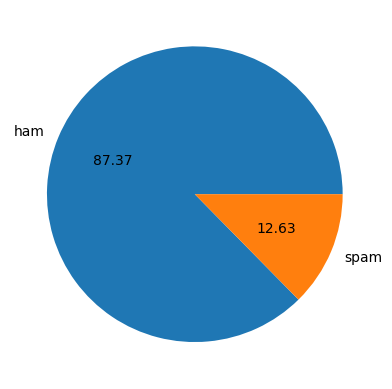

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [39]:
import nltk

In [40]:
!pip install nltk

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
df['num_characters'] = df['text'].apply(len)

In [43]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [45]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
df['num_sentences'] = df['text'].apply (lambda x:len(nltk.sent_tokenize(x)))

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.893983,18.592765,2.005223
std,58.162165,13.395304,1.476261
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,116.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [50]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.423826,17.211692,1.863596
std,56.337586,13.525429,1.418590
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.471669,28.143951,2.984686
std,30.019848,7.132668,1.496339
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


In [52]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

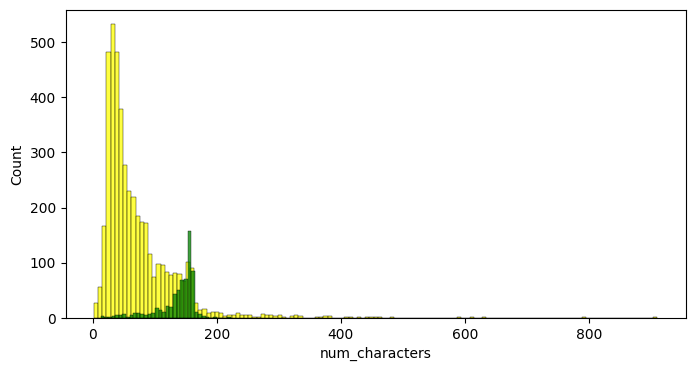

In [53]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']==0]['num_characters'],color='yellow')
sns.histplot(df[df['target']==1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

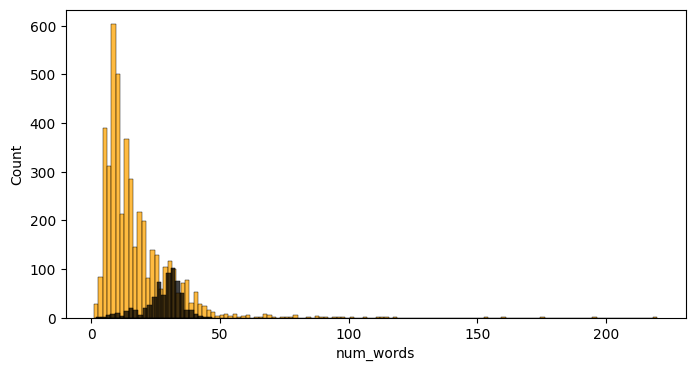

In [54]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']==0]['num_words'],color='orange')
sns.histplot(df[df['target']==1]['num_words'],color='black')

<Axes: xlabel='num_sentences', ylabel='Count'>

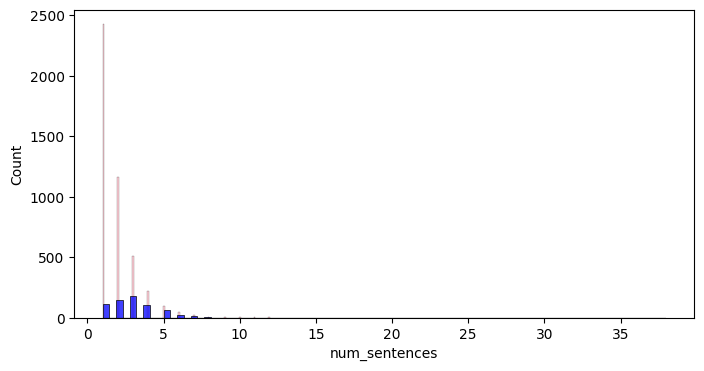

In [55]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']==0]['num_sentences'],color='pink')
sns.histplot(df[df['target']==1]['num_sentences'],color='blue')

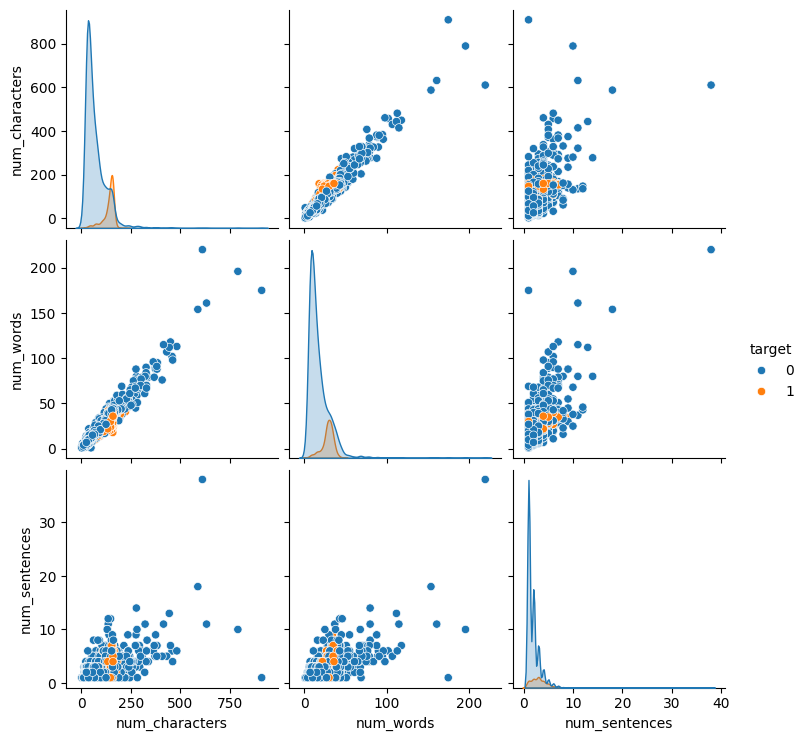

In [56]:
sns.pairplot(df,hue='target')

<Axes: >

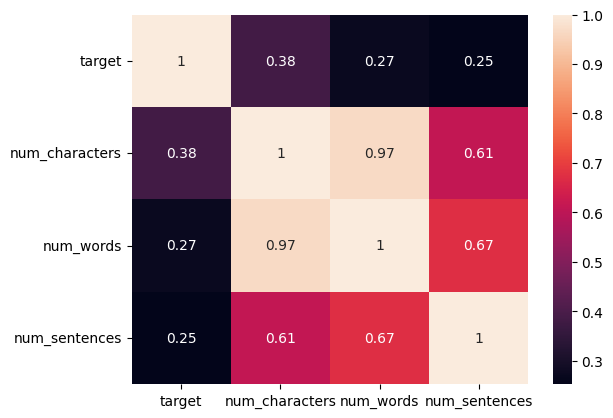

In [57]:
sns.heatmap(df.corr(numeric_only=True),annot=True) # Add numeric_only=True

In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords') # Download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [60]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [61]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('sleeping')

'sleep'

In [62]:
df['transformed_text'] = df['text'].apply(transform_text)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
  from wordcloud import WordCloud
  wc=WordCloud(width=500,height=500,min_font_size=10,background_color='pink')

In [65]:
# In the cell where you call wc.generate
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
#                  ^^^^^^^^^^^^^^ Changed 'transform_text' to 'transformed_text'

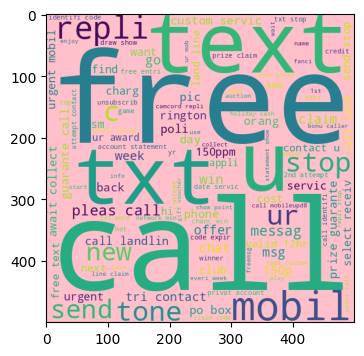

In [66]:
plt.figure(figsize=(12,4))
plt.imshow(spam_wc)

In [67]:
# In the cell where you call wc.generate
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
#                  ^^^^^^^^^^^^^^ Changed 'transform_text' to 'transformed_text'

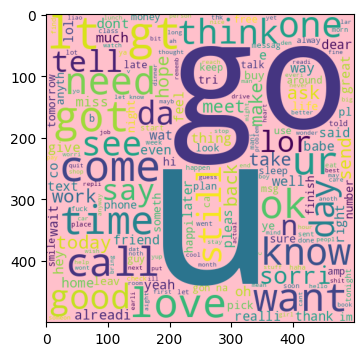

In [68]:
plt.figure(figsize=(12,4))
plt.imshow(ham_wc)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
spam_corpus=[]
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
len(spam_corpus)

10151

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

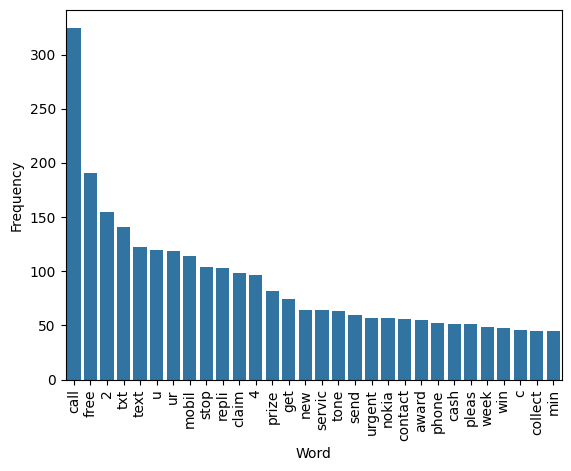

In [72]:
from collections import Counter
import seaborn as sns
import pandas as pd

# Create a DataFrame from the Counter object
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
# The above line creates a DataFrame with two columns: 'Word' and 'Frequency'

# Now use the 'x' and 'y' keywords to specify columns for plotting
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')

In [73]:
ham_corpus=[]
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [74]:
len(ham_corpus)

35343

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

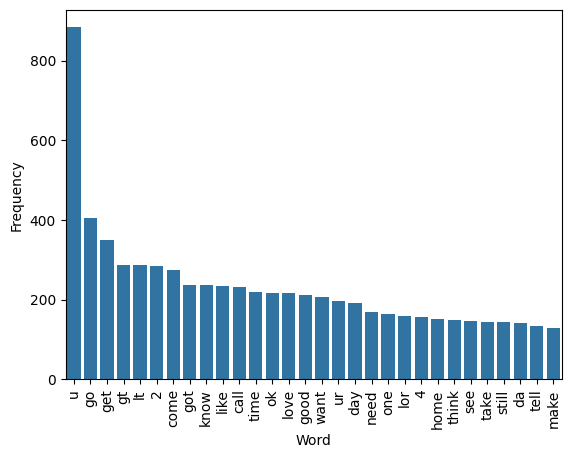

In [75]:
from collections import Counter
import seaborn as sns
import pandas as pd

# Create a DataFrame from the Counter object
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
# The above line creates a DataFrame with two columns: 'Word' and 'Frequency'

# Now use the 'x' and 'y' keywords to specify columns for plotting
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)
plt.xticks(rotation='vertical')

In [76]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [78]:
X=Tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [80]:
X.shape

(5169, 3000)

In [81]:
Y=df['target'].values

In [82]:
Y.shape

(5169,)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [87]:
gnb.fit(X_train, Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.874274661508704
[[782 114]
 [ 16 122]]
0.5169491525423728


In [88]:
 mnb.fit(X_train, Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.97678916827853
[[888   8]
 [ 16 122]]
0.9384615384615385


In [89]:
 bnb.fit(X_train, Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [90]:
# tfidf-->MNB

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [92]:
# 1. Define your classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [93]:
# 2. Store them in a dictionary
clfs = {
    'SVC'     : svc,
    'KN'      : knc,
    'NB'      : mnb,
    'DT'      : dtc,
    'LR'      : lrc,
    'RF'      : rfc,
    'AdaBoost': abc,
    'BgC'     : bc,
    'ETC'     : etc,
    'GBDT'    : gbdt,
    'XGB'     : xgb
}


In [94]:
def train_classifier(clf, x_train, Y_train, x_test, Y_test):
    clf.fit(x_train, Y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(Y_test, y_pred) # Changed 'Y_pred' to 'y_pred' to match the variable name
    precision = precision_score(Y_test, y_pred) # Changed 'Y_pred' to 'y_pred' to match the variable name

    return accuracy, precision

In [95]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)


(0.9738878143133463, 0.9512195121951219)

In [96]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test) # Changed y_train to Y_train and y_test to Y_test

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9512195121951219
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  0.9384615384615385
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8383838383838383
For  LR
Accuracy -  0.9680851063829787
Precision -  0.9646017699115044
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  XGB
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722


In [97]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuray': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [98]:
performance_df

,Algorithm,Accuray,Precision
1,KN,0.905222,1.000000
8,ETC,0.977756,0.983193
5,RF,0.974855,0.982759
4,LR,0.968085,0.964602
0,SVC,0.973888,0.951220
10,XGB,0.970986,0.942623
2,NB,0.976789,0.938462
9,GBDT,0.951644,0.931373
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [99]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")


In [100]:
performance_df1

,Algorithm,variable,value
0,KN,Accuray,0.905222
1,ETC,Accuray,0.977756
2,RF,Accuray,0.974855
3,LR,Accuray,0.968085
4,SVC,Accuray,0.973888
5,XGB,Accuray,0.970986
6,NB,Accuray,0.976789
7,GBDT,Accuray,0.951644
8,BgC,Accuray,0.958414
9,AdaBoost,Accuray,0.924565


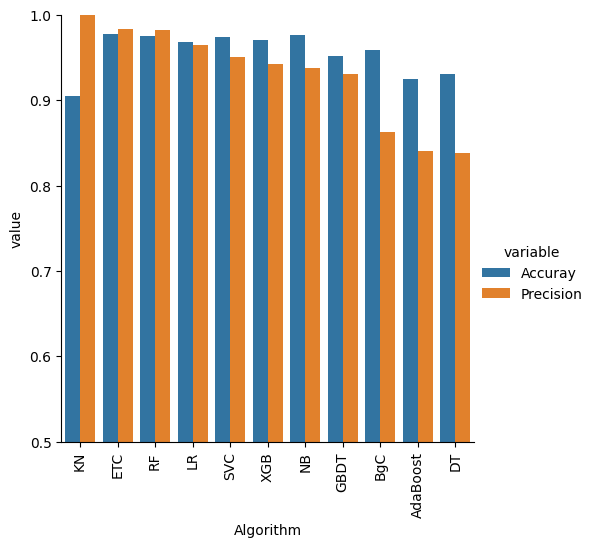

In [101]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1,
            kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [102]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_ft_3000': accuracy_scores,'Precision_max_ft_3000': precision_scores})

In [103]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_scaling': accuracy_scores,'Precision_scaling': precision_scores})

In [104]:
# Assuming you want to merge performance_df with temp_df to form a new_df

# Create a performance DataFrame containing accuracy and precision
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
# This line assumes performance_df was already created using accuracy_scores and precision_scores

# Create a temporary DataFrame containing scaling results
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores})
# This line assumes temp_df was already created using accuracy_scores and precision_scores

# Perform the merge operation
new_df_scaled = performance_df.merge(temp_df, on='Algorithm')
# Instead of new_df.merge, using performance_df.merge to utilize the existing dataframe

In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,LR,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602
4,SVC,0.973888,0.951220,0.973888,0.951220,0.973888,0.951220
5,XGB,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623
6,NB,0.976789,0.938462,0.976789,0.938462,0.976789,0.938462
7,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
8,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
9,AdaBoost,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909


In [106]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [107]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [108]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [109]:
y_pred = voting.predict(X_test)

print("Accuracy", accuracy_score(Y_test, y_pred))
print("Precision", precision_score(Y_test, y_pred))

Accuracy 0.9825918762088974
Precision 0.9761904761904762


In [111]:
# Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Fix: Changed 'y_train' to 'Y_train'
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

# Fix: Changed 'y_test' to 'Y_test'
print("Accuracy", accuracy_score(Y_test, y_pred))
print("Precision", precision_score(Y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [113]:
import pickle
pickle.dump(Tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
